In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import bioframe 
import pandas as pd
import numpy as np 
import os
import json
from io import StringIO
import random

import pysam
import h5py

from Bio import motifs
from Bio import pairwise2
from Bio.Seq import Seq

from matplotlib.colors import ListedColormap

In [2]:
import sys

sys.path.insert(0, "/home1/smaruj/akita_utils/")

# from akita_utils import *
import akita_utils

2022-07-18 16:26:22.781286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-07-18 16:26:22.781321: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
seq_list = []

with open("Weak.fasta", "r") as infile:
    for line in infile.readlines():
        if line[0] != ">" and line[0] != "":
            seq_list.append(line.strip())
    

In [ ]:
# seq_list

In [5]:
def matrix_bp(seq_list):
    
    def split(word):
        return [char for char in word]

    bp_dir = {"A":0, "C":1, "T":2, "G":3}
    
    seq_len = len(seq_list[0].strip())
    num_seq = len(seq_list)
    
    bp_matrix = np.zeros(shape=(num_seq, seq_len))

    for s in range(num_seq):
        seq = seq_list[s]
        bps_list = split(seq.strip())
        for k in range(seq_len):
            bp_matrix[s, k] = bp_dir[bps_list[k]]
    
    fig, ax = plt.subplots(1,1, figsize=(num_seq//3, seq_len//3))
    
    colors = ["green", "blue", "red", "orange"]
    cmap = ListedColormap(colors)
    
    img = ax.imshow(bp_matrix, cmap=cmap)

    flank_ind = [i for i in range(-1,-(seq_len+1),-1)]
    x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

    ax.set_xticks([i for i in range(30)])

    ax.set_xticklabels(x_label_list)
    
    plt.show()
    

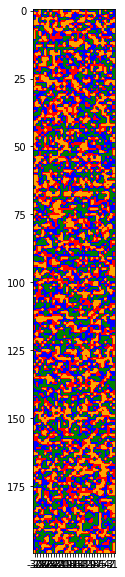

In [6]:
matrix_bp(seq_list)

In [7]:
def cumulative_bp_sum(seq_list):
    
    def split(word):
        return [char for char in word]

    bp_dir = {"A":0, "C":1, "T":2, "G":3}
    
    seq_len = len(seq_list[0].strip())

    cumsum_matrix = np.zeros(shape=(4, seq_len))

    for seq in seq_list:
        bps_list = split(seq.strip())
        for k in range(len(bps_list)):
            ind = bp_dir[bps_list[k]]
            cumsum_matrix[ind, k] += 1
    
    return cumsum_matrix

In [8]:
test = cumulative_bp_sum(seq_list)

In [9]:
def plot_bps_freq(seq_list, size=(20,16)):
    
    cumsum_matrix = cumulative_bp_sum(seq_list)
    
    fig, ax = plt.subplots(1,1, figsize=size)

    img = ax.imshow(test)

    y_label_list = ["A", "C", "T", "G"]

    flank_ind = [i for i in range(-1,-31,-1)]
    x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

    # x_label_list = [i for i in range(-1,-30)]

    ax.set_xticks([i for i in range(30)])
    ax.set_yticks([0,1,2,3])

    ax.set_xticklabels(x_label_list)
    ax.set_yticklabels(y_label_list)

    fig.colorbar(img, shrink = 0.5)
    plt.show()

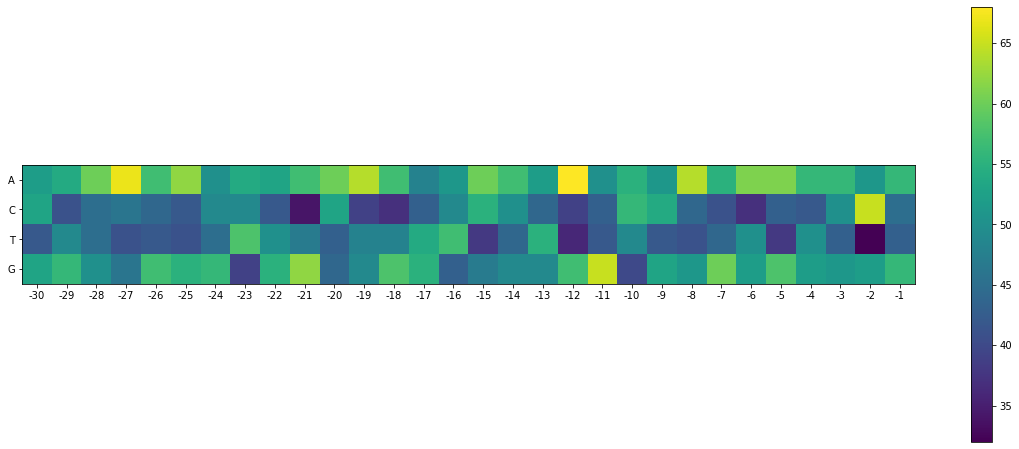

In [10]:
plot_bps_freq(seq_list)

In [11]:
pd_test = pd.DataFrame(np.transpose(test), columns=["A", "C", "G", "T"])

In [12]:
import logomaker
#https://logomaker.readthedocs.io/en/latest/index.html

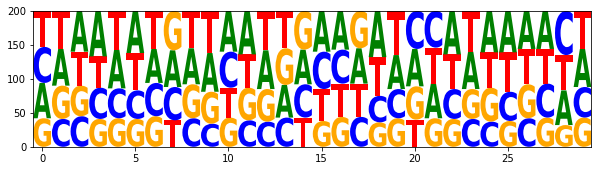

In [13]:
logomaker.Logo(pd_test).draw()

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


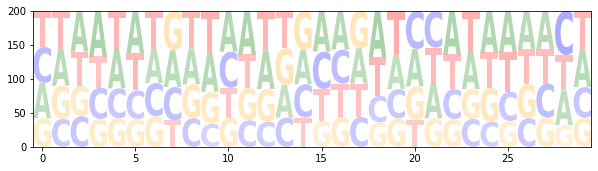

In [14]:
logomaker.Logo(pd_test).fade_glyphs_in_probability_logo()

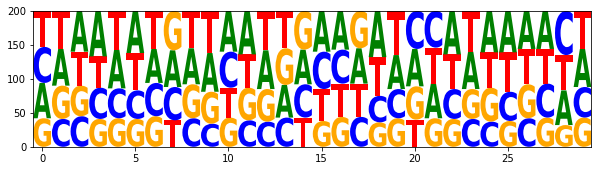

In [15]:
logomaker.Logo(pd_test).style_glyphs_below()